# Final Project

### Student Name: Joanne Chou
### Net ID: yenchou2

In [1]:
from modules import *

## Load Data

In [2]:
input_filename = "OnlineNewsPopularity.csv"

print("\n**********Loading Data**********\n")
data = load_data(input_filename)


**********Loading Data**********

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_title                 39644 non-null  float64
 1    n_tokens_content               39644 non-null  float64
 2    n_unique_tokens                39644 non-null  float64
 3    n_non_stop_words               39644 non-null  float64
 4    n_non_stop_unique_tokens       39644 non-null  float64
 5    num_hrefs                      39644 non-null  float64
 6    num_self_hrefs                 39644 non-null  float64
 7    num_imgs                       39644 non-null  float64
 8    num_videos                     39644 non-null  float64
 9    average_token_length           39644 non-null  float64
 10   num_keywords                   39644 non-null  float64
 11   data_channel_is_life

## EDA

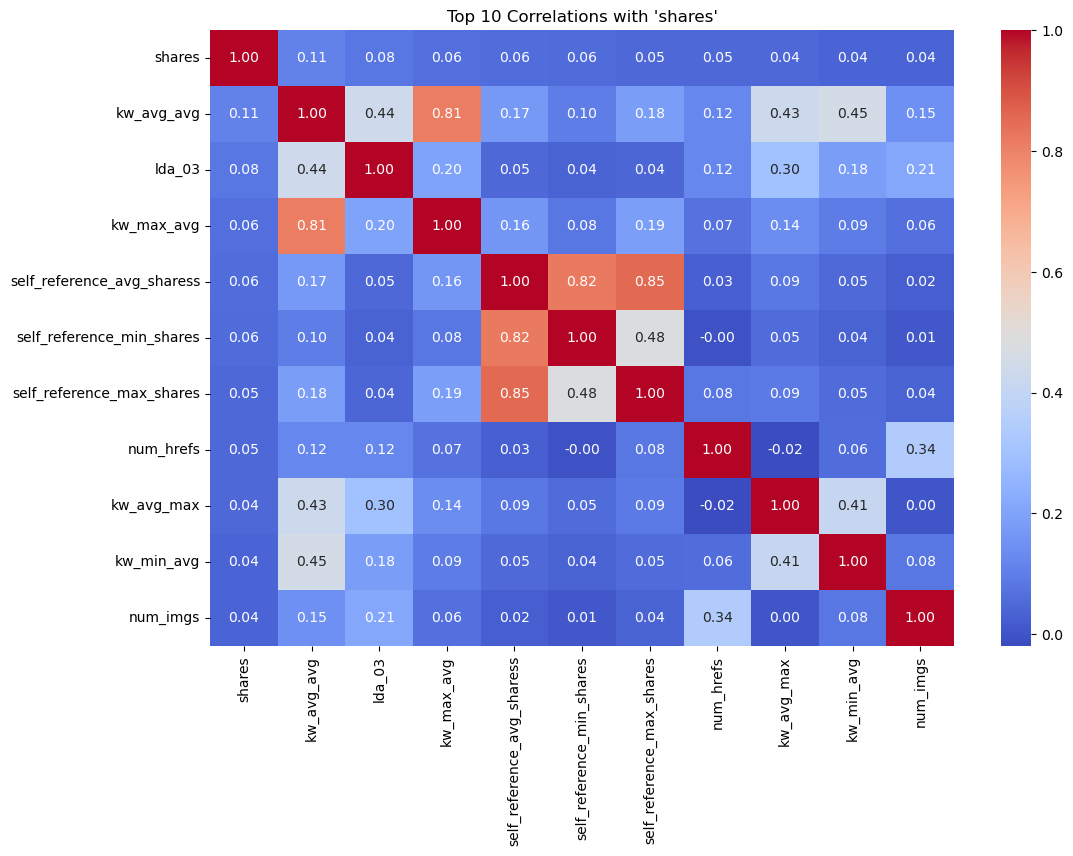

Top correlated features with 'shares':
['shares', 'kw_avg_avg', 'lda_03', 'kw_max_avg', 'self_reference_avg_sharess', 'self_reference_min_shares', 'self_reference_max_shares', 'num_hrefs', 'kw_avg_max', 'kw_min_avg', 'num_imgs']


In [3]:
top_features = plot_top_correlations(data, target_column='shares', top_n=10)

print("Top correlated features with 'shares':")
print(top_features)

## Train Model

In [4]:
X = data[top_features].drop('shares', axis=1)
y = data['shares']

# Split the data
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

# Train the Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediction
y_val_pred = lr_model.predict(X_val)
y_test_pred = lr_model.predict(X_test)

# Validation
rmse_val = root_mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Test
rmse_test = root_mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\n************* Model Evaluation *************\n")
print(f"Validation RMSE: {rmse_val:.2f}, R-squared: {r2_val:.4f}")
print(f"Test RMSE: {rmse_test:.2f}, R-squared: {r2_test:.4f}")


************** Splitting Data **************

Train Data: (31715, 10)
Validation Data: (3964, 10)
Test Data: (3965, 10)

************* Model Evaluation *************

Validation RMSE: 8936.07, R-squared: 0.0248
Test RMSE: 9609.24, R-squared: 0.0185


## Model Tuning

In [5]:
# Define Ridge Regression with GridSearchCV
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 50, 100, 200]}  

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model
best_ridge = grid_search.best_estimator_

# Prediction
y_val_pred_ridge = best_ridge.predict(X_val)
y_test_pred_ridge = best_ridge.predict(X_test)

# Evaluation
rmse_val_ridge = root_mean_squared_error(y_val, y_val_pred_ridge)
r2_val_ridge = r2_score(y_val, y_val_pred_ridge)

rmse_test_ridge = root_mean_squared_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

print("\n************* Model Tuning *************\n")
print(f"Validation RMSE: {rmse_val_ridge:.2f}, r2_val_ridge: {r2_val:.4f}")
print(f"Test RMSE: {rmse_test_ridge:.2f}, R-squared: {r2_test_ridge:.4f}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits

************* Model Tuning *************

Validation RMSE: 8936.41, r2_val_ridge: 0.0248
Test RMSE: 9609.33, R-squared: 0.0185
